### MNIST 최적? 모델 찾아보기
- 최적의 파람 찾아보기
- multi classification, supervised learning
- frame work: Pytoch

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import cv2

import work_mnist_func as work

In [2]:
work.utils()

--- Notice ---
random_state: 24
device: cpu

pandas ver: 2.0.3
numpy ver: 1.24.3
matplotlib ver: 3.7.2
scikit-learn ver: 1.3.2

torch ver: 2.4.1
torchinfo ver: 1.8.0
torchmetrics ver: 1.4.2



In [3]:
train_path = '../data/MNIST/mnist_train.csv'
test_path = '../data/MNIST/mnist_test.csv'

In [4]:
train_df = pd.read_csv(train_path, encoding='utf8')
test_df = pd.read_csv(test_path, encoding='utf-8')

train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 60000 entries, 0 to 59999
Columns: 785 entries, label to pixel784
dtypes: int64(785)
memory usage: 359.3 MB


In [5]:
mnist_train_dt = work.TrainMnistDataset(train_df)
mnist_test_dt = work.TestMnistDataset(test_df)

In [6]:
# hidden_range: 3
# node_list: [500, 300, 100, 50]
mnist_model = work.MnistMCModel(3, [500, 300, 100, 50])

print(mnist_model)
work.summary(mnist_model, input_size=(1000, 784))

MnistMCModel(
  (input_layer): Linear(in_features=784, out_features=500, bias=True)
  (hidden_layer): ModuleList(
    (0): Linear(in_features=500, out_features=300, bias=True)
    (1): Linear(in_features=300, out_features=100, bias=True)
    (2): Linear(in_features=100, out_features=50, bias=True)
  )
  (output_layer): Linear(in_features=50, out_features=10, bias=True)
)


Layer (type:depth-idx)                   Output Shape              Param #
MnistMCModel                             [1000, 10]                --
├─Linear: 1-1                            [1000, 500]               392,500
├─ModuleList: 1-2                        --                        --
│    └─Linear: 2-1                       [1000, 300]               150,300
│    └─Linear: 2-2                       [1000, 100]               30,100
│    └─Linear: 2-3                       [1000, 50]                5,050
├─Linear: 1-3                            [1000, 10]                510
Total params: 578,460
Trainable params: 578,460
Non-trainable params: 0
Total mult-adds (M): 578.46
Input size (MB): 3.14
Forward/backward pass size (MB): 7.68
Params size (MB): 2.31
Estimated Total Size (MB): 13.13

In [7]:
# parameter: dataset, model, epochs, lr, batch_size, patience
# dataset: mnist_train_dt
# model: mnist_model
# epochs: 100
# lr: 0.001
# batch_size: 32
# patience: 10

loss_dict, acc_dict, f1_dict = work.training(mnist_train_dt, mnist_model, 100, patience=5)

saved first
saved model
saved model
[    5/  100]  [Train]         loss: 0.052755, score: 0.984810
[    5/  100]  [Validation]    loss: 0.244402, score: 0.969722

saved model
성능 및 손실의 개선이 없어서 학습을 중단합니다.

[    7/  100]  [Train]         loss: 0.044397, score: 0.986690
[    7/  100]  [Validation]    loss: 0.281906, score: 0.964000



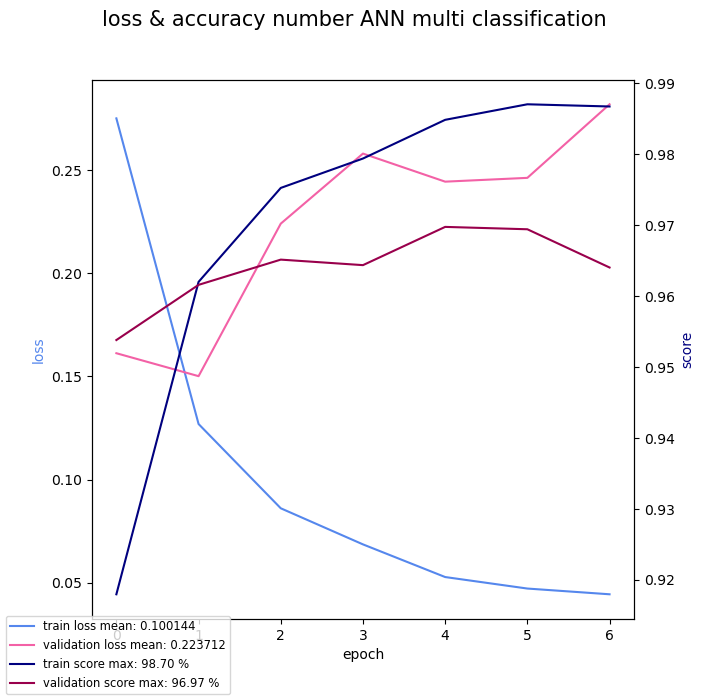

In [8]:
work.draw_two_plot(loss_dict, acc_dict, 'loss & accuracy')

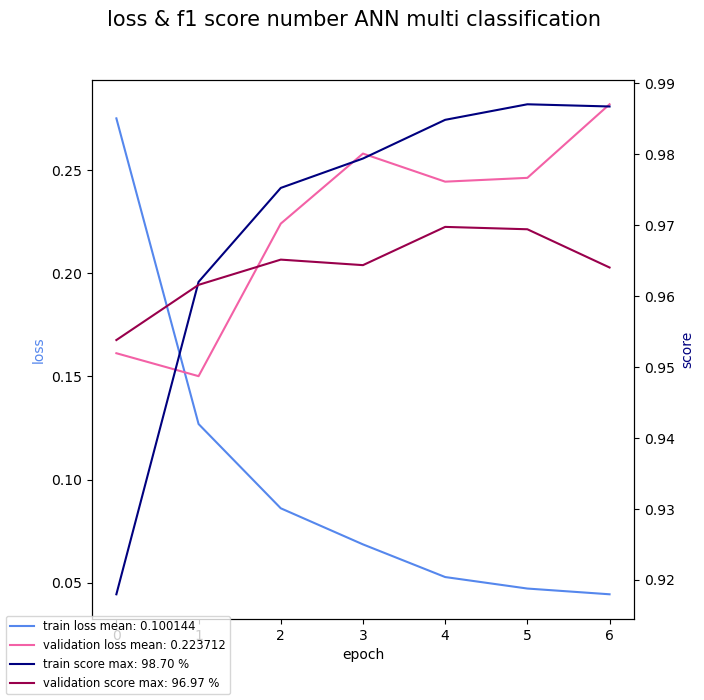

In [9]:
work.draw_two_plot(loss_dict, f1_dict, 'loss & f1 score')

predict number: 4
real number: 4

image data: torch.Size([28, 28]), 2D


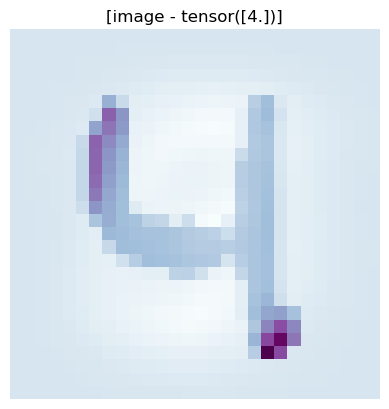

In [15]:
num = 3500
work.draw_predict_figure(mnist_model, mnist_test_dt.X_test_ts, mnist_test_dt.y_test_ts, num)

# pred = work.predict(mnist_model, mnist_test_dt.X_test_ts[num])

# print(f"predict number: {pred}")
# print(f"real number: {int(mnist_test_dt.y_test_ts[num].item())}\n")

# image_data = mnist_test_dt.feature_df[num].reshape(-1, 28)
# print(f"image data: {image_data.shape}, {image_data.ndim}D")

# plt.imshow(image_data, cmap='BuPu')
# plt.title(f"[image - {mnist_test_dt.laber_df.iloc[num]}]")
# plt.axis('off')
# plt.show()

In [11]:
loss, acc, f1 = work.testing(mnist_model, mnist_test_dt.X_test_ts, mnist_test_dt.y_test_ts)

# print(f"test loss: {sum(loss)/len(loss):.6f}")
# print(f"test accuracy: {sum(acc)/len(acc)*100:.2f} %")
# print(f"test f1 score: {sum(f1)/len(f1)*100:.2f} %")

print(f"test loss: {loss:.6f}")
print(f"test accuracy: {acc*100:.2f} %")
print(f"test f1 score: {f1*100:.2f} %")

test loss: 0.166666
test accuracy: 96.53 %
test f1 score: 96.53 %


In [12]:
from torchmetrics.classification import ConfusionMatrix
import seaborn as sns

In [13]:
pred = mnist_model(mnist_test_dt.X_test_ts)
y_data = mnist_test_dt.y_test_ts.reshape(-1).long()

mat = ConfusionMatrix(task='multiclass', num_classes=10)(pred, y_data)
mat

tensor([[ 971,    1,    1,    0,    1,    2,    2,    1,    0,    1],
        [   0, 1128,    1,    0,    0,    1,    2,    1,    2,    0],
        [   6,    3,  993,    3,    1,    1,    2,   19,    3,    1],
        [   0,    0,    3,  952,    0,   31,    0,    9,    7,    8],
        [   1,    1,    6,    1,  954,    1,    4,    1,    0,   13],
        [   1,    0,    0,    5,    0,  876,    1,    2,    5,    2],
        [   3,    5,    2,    2,    4,   37,  904,    0,    0,    1],
        [   0,    6,    9,    3,    1,    2,    0,  996,    1,   10],
        [   9,   11,    5,    4,    4,   12,    2,    9,  905,   13],
        [   2,    3,    0,    1,    9,   14,    0,    6,    0,  974]])

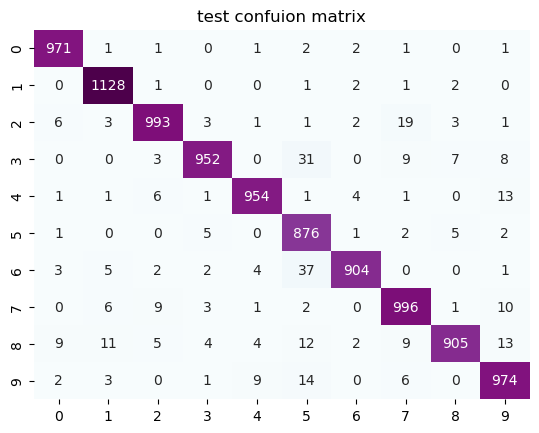

In [14]:
sns.heatmap(mat, annot=True, cmap='BuPu', cbar=False, fmt=f'.0f')
plt.title('test confuion matrix')
plt.show()